In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load datasets
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")

In [3]:
# Merge datasets
df = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(df, stores, on='Store', how='left')


In [4]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Extract additional date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)


In [6]:
# Fill NA values with 0 (for simplicity in this version)
df.fillna(0, inplace=True)

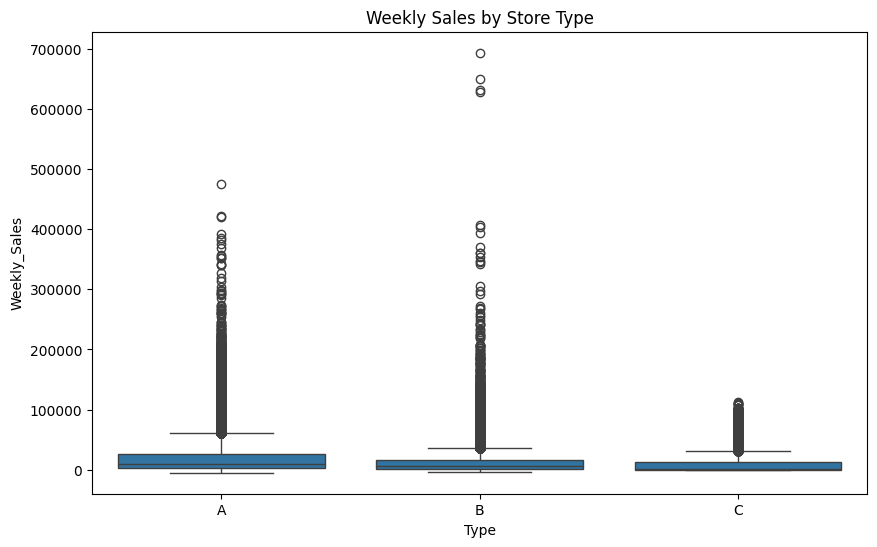

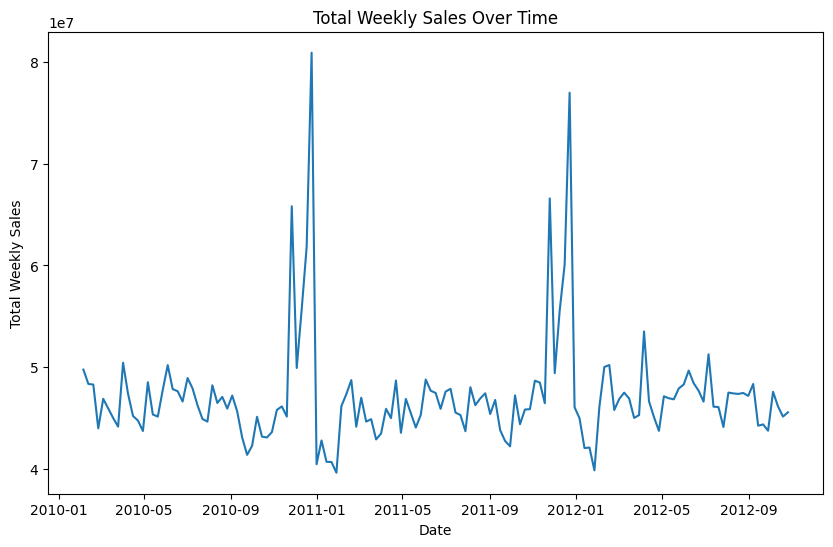

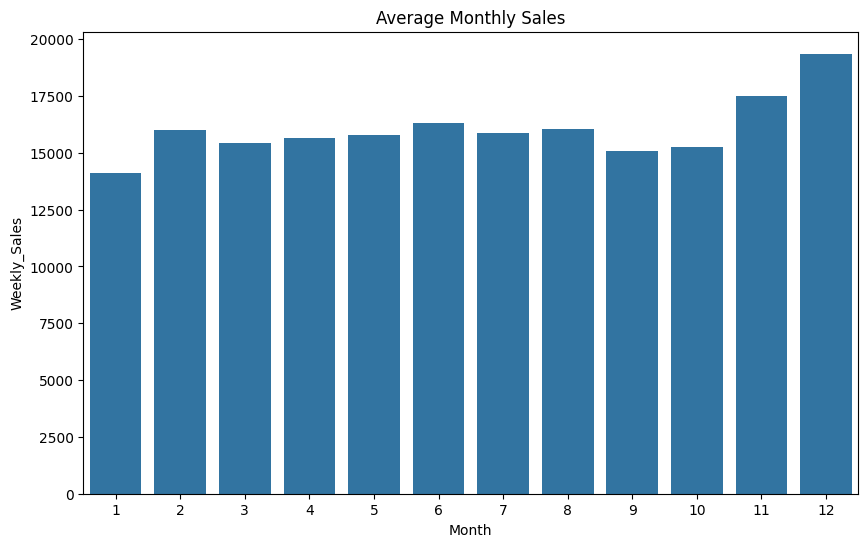

In [7]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title("Weekly Sales by Store Type")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby('Date')['Weekly_Sales'].sum())
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Total Weekly Sales")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('Month')['Weekly_Sales'].mean().reset_index(), x='Month', y='Weekly_Sales')
plt.title("Average Monthly Sales")
plt.show()


In [8]:
# Prepare data for modeling
cols_to_drop = ['Date', 'Weekly_Sales']
X = df.drop(columns=cols_to_drop)
y = df['Weekly_Sales']


In [9]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Type'])

In [10]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train model: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [12]:
# Train model: Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [13]:
# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Linear Regression MSE: 473169236.2096437
Linear Regression R2: 0.09262597024152841
Random Forest MSE: 13467694.000438802
Random Forest R2: 0.9741736468866335


# **Metrik Evaluasi dalam Regresi Linear**

### **Mean Squared Error (MSE)**
MSE adalah rata-rata kuadrat dari selisih antara nilai aktual ($y_i$) dan nilai prediksi ($\hat{y}_i$):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### **Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE, yang memiliki satuan yang sama dengan data asli:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

### **R-squared (R²)**
$R^2$ mengukur seberapa baik model menjelaskan variasi dalam data:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Dengan:

$$
SS_{res} = \sum (y_i - \hat{y}_i)^2
$$

$$
SS_{tot} = \sum (y_i - \bar{y})^2
$$

- $SS_{res}$ = jumlah kuadrat residual (error)  
- $SS_{tot}$ = jumlah kuadrat total  

**Interpretasi:**
- Jika **$R^2 \approx 1$** → Model sangat baik  
- Jika **$R^2 \approx 0$** → Model kurang baik  

---


## **Kesimpulan Evaluasi Model**

Berikut adalah hasil evaluasi dari dua model regresi:

| Model             | MSE                   | $R^2$        |
|------------------|------------------------|--------------|
| Linear Regression| $473,\!169,\!236.21$   | $0.093$      |
| Random Forest    | $13,\!467,\!694.00$    | $0.974$      |

---

### **Interpretasi**

- Model **Random Forest** menunjukkan performa yang jauh lebih baik dibanding **Linear Regression**.
- Hal ini terlihat dari:
  - **MSE yang jauh lebih kecil**, menunjukkan prediksi lebih akurat.
  - **$R^2$ mendekati 1**, artinya model menjelaskan variasi data dengan sangat baik.
- Sebaliknya, Linear Regression memiliki **$R^2$ rendah**, menandakan model kurang mampu menangkap pola kompleks dalam data.

---
